In [103]:
import numpy as np

In [104]:
input_size = 3 # number of features
layers = [4,3] # NUmber of neurons in the first and the second layer
output_size = 2

# Defining a Neural Network 

In [105]:
# Defining softmax helper function
def softmax(a):
    """Softmax is a function that does e^a(i)/sum(e^a(i)) , suppose a=[1,2,3] then its softmax would be e^1/(e^1+e^2+e^3) , 
    e^2/(e^1+e^2+e^3), e^3/(e^1+e^2+e^3). Here we can see that the sum is going to be 1 for all the values that we have we have 
    calculated so far.
    """
    e_pa = np.exp(a) # numpy does broadcasting for a vector so e_pa is a vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True) # axis is 0 for colums which is by default and axis 1 is for rows. Keepdims explained below
    return ans

a = np.array([[10,10],[20,20]])
a_ = softmax(a)
print(a_)

[[0.5 0.5]
 [0.5 0.5]]


In [106]:
a = np.array([[1,2,3],[6,5,4]])
print(np.sum(a)) # This would give us the sum of all the elements in the 2d vector.
print(np.sum(a,axis=0)) # Sum of all the columns
print(np.sum(a,axis=1)) # Sum of all the elements along the row
# Now keepdims just preservs the shape of the array
print(np.sum(a,axis=0,keepdims=True)) # This would return thr sum along the columns in a 2d vector

21
[7 7 7]
[ 6 15]
[[7 7 7]]


In [107]:
weg = np.random.randn(input_size,layers[0])
print(weg)

[[-1.16514984  0.90082649  0.46566244 -1.53624369]
 [ 1.48825219  1.89588918  1.17877957 -0.17992484]
 [-1.07075262  1.05445173 -0.40317695  1.22244507]]


In [108]:
class NeuralNetwork():
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {}
        
        # First Layer
        model['W1'] = np.random.randn(input_size,layers[0]) #this would generate a normal distribution.
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1]) 
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third Layer/Output layer
        model['W3'] = np.random.randn(layers[1],output_size) 
        model['b3'] = np.zeros((1,output_size))
        
        self.model=model
        self.activation_output = None
        
        
    # Defining forward propagation
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1)+b1
        a1 = np.tanh(z1) # tanh is a function like sigmoid as it converts any input in range -1 to 1, sigmoid does in range 0 and 1
        
        z2 = np.dot(a1,W2)+b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3)+b3
        y_ = softmax(z3)
        
        self.activation_output = (a1,a2,y_)
        return y_
        
        
    # Defining Back propagation - one of the toughest topics to understand in deep learning
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_output
        
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3) # its derivative of W
        db3 = np.sum(delta3,axis=0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        # Update the model parameters using gradient descent
        self.model["W1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3

        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_output
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("y_ ",y_.shape)

In [109]:

def loss(y_out,p):
    l = -np.mean(y_out*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [110]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [111]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.05, random_state=1,factor=0.8)

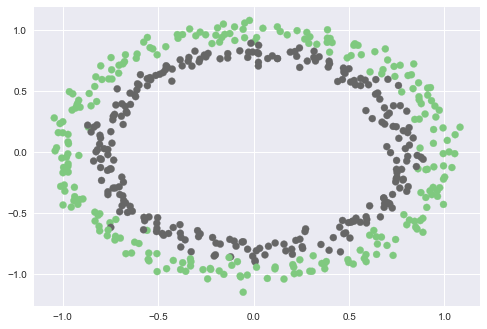

In [112]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [113]:
print(Y)

[1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 

In [114]:
y_onehot = one_hot(Y,3)
print(y_onehot)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Training our Model

In [115]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [116]:
forward = model.forward(X)
print(forward.shape)

(500, 2)


In [117]:
model.summary()

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
y_  (500, 2)


In [118]:
def train(X,Y,model,epochs,learning_rate,logs=True):   # Logs tell wheather to print epoch and loss or not
    
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [131]:
losses = train(X,Y,model,500,0.001)

Epoch 0 Loss 0.3463
Epoch 1 Loss 0.3463
Epoch 2 Loss 0.3463
Epoch 3 Loss 0.3463
Epoch 4 Loss 0.3463
Epoch 5 Loss 0.3463
Epoch 6 Loss 0.3463
Epoch 7 Loss 0.3463
Epoch 8 Loss 0.3463
Epoch 9 Loss 0.3463
Epoch 10 Loss 0.3463
Epoch 11 Loss 0.3463
Epoch 12 Loss 0.3463
Epoch 13 Loss 0.3463
Epoch 14 Loss 0.3463
Epoch 15 Loss 0.3463
Epoch 16 Loss 0.3463
Epoch 17 Loss 0.3463
Epoch 18 Loss 0.3463
Epoch 19 Loss 0.3463
Epoch 20 Loss 0.3463
Epoch 21 Loss 0.3463
Epoch 22 Loss 0.3463
Epoch 23 Loss 0.3463
Epoch 24 Loss 0.3463
Epoch 25 Loss 0.3463
Epoch 26 Loss 0.3463
Epoch 27 Loss 0.3463
Epoch 28 Loss 0.3463
Epoch 29 Loss 0.3463
Epoch 30 Loss 0.3463
Epoch 31 Loss 0.3463
Epoch 32 Loss 0.3463
Epoch 33 Loss 0.3463
Epoch 34 Loss 0.3463
Epoch 35 Loss 0.3463
Epoch 36 Loss 0.3463
Epoch 37 Loss 0.3463
Epoch 38 Loss 0.3463
Epoch 39 Loss 0.3463
Epoch 40 Loss 0.3463
Epoch 41 Loss 0.3463
Epoch 42 Loss 0.3463
Epoch 43 Loss 0.3463
Epoch 44 Loss 0.3463
Epoch 45 Loss 0.3463
Epoch 46 Loss 0.3463
Epoch 47 Loss 0.3463
Ep

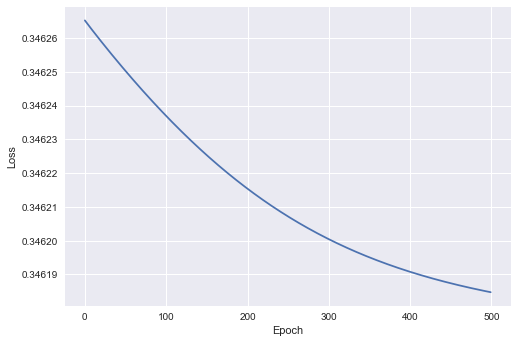

In [132]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Finding Accuracy 

In [133]:
from visualize import plot_decision_boundary

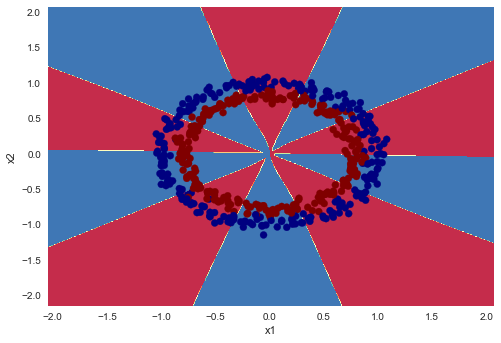

In [137]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [138]:
outputs = model.predict(X)

In [139]:
outputs == Y

array([False,  True, False,  True, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
        True,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False,  True,
        True,  True,

In [140]:
training_accuracy = np.sum(outputs == Y)/Y.shape[0]
print(training_accuracy)

0.528


# Testing our model with different types of dataset

In [141]:
# XOR Dataset - 0^0=0, 1^1=0, 0^1=1, 1^0=1 , its linearly inseperable if we plot it. For creating XOR Dataset we need to take arrays
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

In [142]:
losses = train(X,Y,model,100,0.01)

Epoch 0 Loss 0.3577
Epoch 1 Loss 0.3547
Epoch 2 Loss 0.3518
Epoch 3 Loss 0.3490
Epoch 4 Loss 0.3463
Epoch 5 Loss 0.3437
Epoch 6 Loss 0.3411
Epoch 7 Loss 0.3386
Epoch 8 Loss 0.3361
Epoch 9 Loss 0.3337
Epoch 10 Loss 0.3313
Epoch 11 Loss 0.3289
Epoch 12 Loss 0.3265
Epoch 13 Loss 0.3241
Epoch 14 Loss 0.3217
Epoch 15 Loss 0.3193
Epoch 16 Loss 0.3168
Epoch 17 Loss 0.3144
Epoch 18 Loss 0.3119
Epoch 19 Loss 0.3094
Epoch 20 Loss 0.3068
Epoch 21 Loss 0.3042
Epoch 22 Loss 0.3016
Epoch 23 Loss 0.2989
Epoch 24 Loss 0.2962
Epoch 25 Loss 0.2934
Epoch 26 Loss 0.2907
Epoch 27 Loss 0.2878
Epoch 28 Loss 0.2849
Epoch 29 Loss 0.2820
Epoch 30 Loss 0.2791
Epoch 31 Loss 0.2761
Epoch 32 Loss 0.2731
Epoch 33 Loss 0.2701
Epoch 34 Loss 0.2670
Epoch 35 Loss 0.2639
Epoch 36 Loss 0.2609
Epoch 37 Loss 0.2578
Epoch 38 Loss 0.2547
Epoch 39 Loss 0.2516
Epoch 40 Loss 0.2486
Epoch 41 Loss 0.2455
Epoch 42 Loss 0.2425
Epoch 43 Loss 0.2395
Epoch 44 Loss 0.2365
Epoch 45 Loss 0.2335
Epoch 46 Loss 0.2306
Epoch 47 Loss 0.2277
Ep

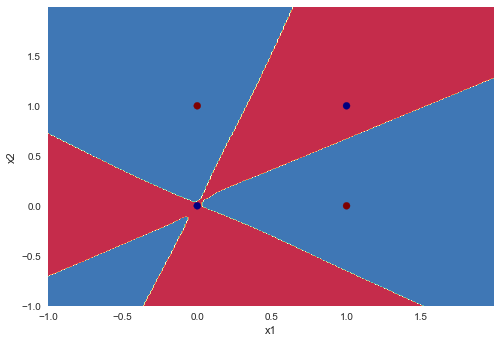

In [143]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

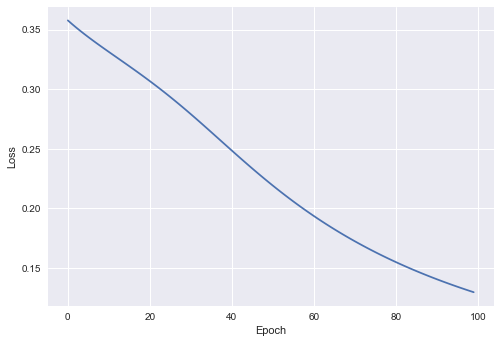

In [145]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Comaparing Accuracy on different type of datasets

In [146]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [147]:

def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

In [148]:
datasets = ["xor","classification","circles","moons"]

Training Accurcay for xor is 1.0000


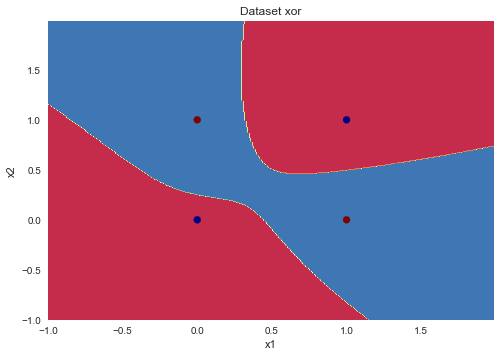

Training Accurcay for classification is 0.9480


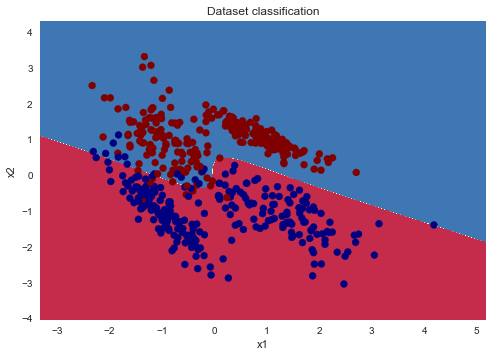

Training Accurcay for circles is 0.9240


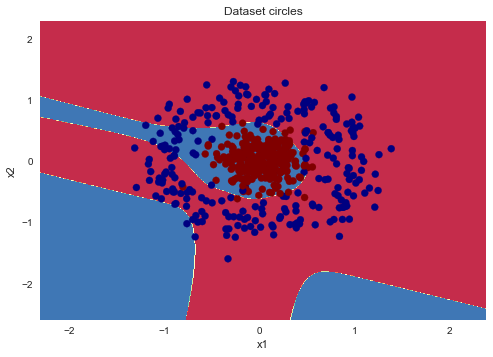

Training Accurcay for moons is 0.9460


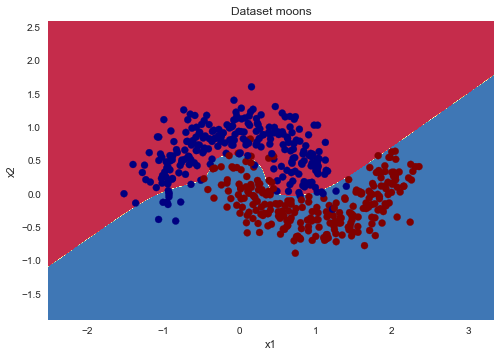

In [150]:
for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    training_accuracy = np.sum(outputs == Y)/Y.shape[0]
    print("Training Accurcay for %s is %.4f"%(d,training_accuracy))
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()